In [14]:
using ExprOptimization

In [15]:
grammar = @grammar begin
    R = x
    R = R * R
    R = R + R
end

ExprRules.Grammar(Any[:x, :(R * R), :(R + R)], Symbol[:R, :R, :R], Bool[true, false, false], Bool[false, false, false], Dict(:R=>[1, 2, 3]), Array{Symbol,1}[Symbol[], Symbol[:R, :R], Symbol[:R, :R]])

Sample a random derivation tree

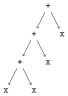

In [16]:
srand(1)
tree = rand(RuleNode, grammar, :R, 4)
display(tree, grammar)

Get the expression encoded by the tree

In [17]:
ex = get_executable(tree, grammar)

:(((x + x) + x) + x)

Define ground truth expression for symbolic regression and the loss function.

In [18]:
ground_truth(x) = x^3 + x^2 + x
function ExprOptimization.loss(tree::RuleNode)
    ex = get_executable(tree, grammar)
    los = 0.0
    global x
    for x = -5.0:0.5:5.0
        los += abs2(eval(ex) - ground_truth(x))
    end
    los
end

Monte Carlo optimization

In [19]:
?MonteCarloParams

search: MonteCarloParams



```
MonteCarloParams
```

Parameters for Monte Carlo.

# Arguments:

  * `num_samples::Int`: number of samples
  * `max_depth::Int`: maximum depth of derivation tree


In [20]:
srand(1)
p = MonteCarloParams(10000, 5)
results1 = optimize(p, grammar, :R)
(results1.expr, results1.loss)

(:((x * x + (x * x) * x) + x), 0.0)

Genetic Programming optimization

In [21]:
?GeneticProgramParams

search: GeneticProgramParams GeneticProgram



```
GeneticProgramParams
```

Parameters for Genetic Programming.

# Arguments

  * `pop_size::Int`: population size
  * `iterations::Int`: number of iterations
  * `max_depth::Int`: maximum depth of derivation tree
  * `p_reproduction::Float64`: probability of reproduction operator
  * `p_crossover::Float64`: probability of crossover operator
  * `p_mutation::Float64`: probability of mutation operator
  * `init_method::InitializationMethod`: initialization method
  * `select_method::SelectionMethod`: selection method


In [22]:
srand(1)
p = GeneticProgramParams(1000,10,5,0.3,0.3,0.4)
results2 = optimize(p, grammar, :R)
(results2.expr, results2.loss)

(:((x * x + (x * x) * x) + x), 0.0)

In [23]:
?CrossEntropyParams

search: CrossEntropyParams



```
CrossEntropyParams
```

Parameters for Cross Entropy method.

# Arguments

  * `pop_size::Int`: population size
  * `iiterations::Int`: number of iterations
  * `max_depth::Int`: maximum depth of derivation tree
  * `top_k::Int`: top k elite samples used in selection
  * `p_init::Float64`: initial value when fitting MLE
  * `init_method::InitializationMethod`: Initialization method


In [24]:
srand(1)
p = CrossEntropyParams(1000,10,5,500)
results3 = optimize(p, grammar, :R)
(results3.expr, results3.loss)

(:(x * (x + x * x) + x), 0.0)

In [25]:
?PIPEParams

search: PIPEParams



```
PIPEParams
```

Parameters for Probabilistic Incremental Program Evolution. Example parameters from paper are indicated in parentheses)

# Arguments:

  * `ppt_params::PPTParams`: parameters for PPT  (e.g., [0.8, 0.2])
  * `pop_size::Int`: population size
  * `iterations::Int`: number of iterations
  * `p_elitist::Float64`: elitist update probability (e.g., 0.2)
  * `c::Float64`: learning rate multiplier (e.g., 0.1)
  * `α::Float64`: learning rate (e.g., 0.05)
  * `ϵ::Float64`: fitness constant (e.g., 1)
  * `p_mutation::Float64`: mutation probability (e.g., 0.2)
  * `β::Float64`: mutation rate (e.g., 0.6)
  * `p_threshold::Float64`: prune threshold (e.g., 0.999)
  * `max_depth::Int`: maximum depth of derivation tree


In [26]:
srand(0)
p = PIPEParams(PIPE.PPTParams(0.8),1000,10,0.2,0.1,0.05,1,0.2,0.6,0.999,10)
results4 = optimize(p, grammar, :R)
(results4.expr, results4.loss)

(:((x + x * x) * x + x), 0.0)